<a href="https://colab.research.google.com/github/Felipe-Oliveira11/Fashion-MNIST/blob/master/Fashion_MNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fashion MNIST 

<br>
<hr>

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model

import time 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

!pip install mlxtend
import mlxtend as ml
from mlxtend.plotting import plot_confusion_matrix

print(tf.__version__)
print(ml.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0
0.14.0


In [2]:
# seed 
seed_value = 42
np.random.seed(seed_value)

In [3]:
# dataset de imagens
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
# treino e teste 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As imagens são arrays NumPy de 28x28, com os valores des pixels entre 0 to 255. As labels (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

* 0	Camisetas/Top (T-shirt/top)
* 1	Calça (Trouser)
* 2	Suéter (Pullover)
* 3	Vestidos (Dress)
* 4	Casaco (Coat)
* 5	Sandálias (Sandal)
* 6	Camisas (Shirt)
* 7	Tênis (Sneaker)
* 8	Bolsa (Bag)
* 9	Botas (Ankle boot)

In [5]:
# classes 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# shape de treino 
X_train.shape

(60000, 28, 28)

In [7]:
# labels 
y_train.shape

(60000,)

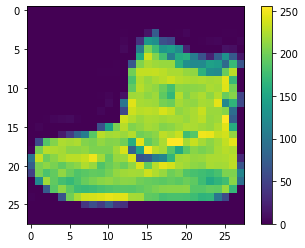

In [8]:
# imagens 
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

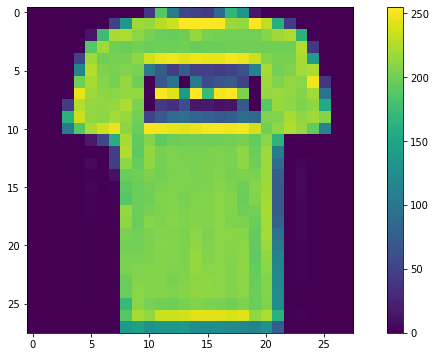

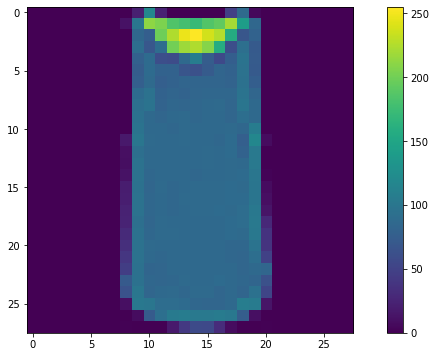

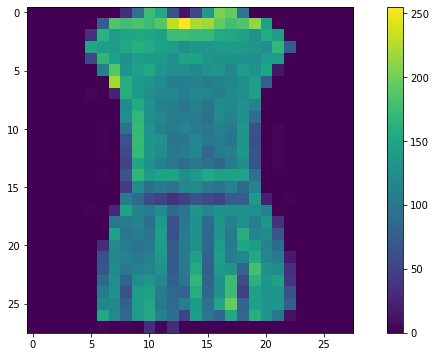

In [9]:
# visualizando imagens 
for i in range(1,4):
  plt.figure(figsize=(12,6))
  plt.imshow(X_train[i])
  plt.colorbar()
  plt.grid(False)
  plt.show

Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o conjunto de treinamento e o conjunto de teste podem ser pré-processados do mesmo modo:

In [10]:
# pré-processamento 
X_train = X_train / 255.0

X_test = X_test / 255.0

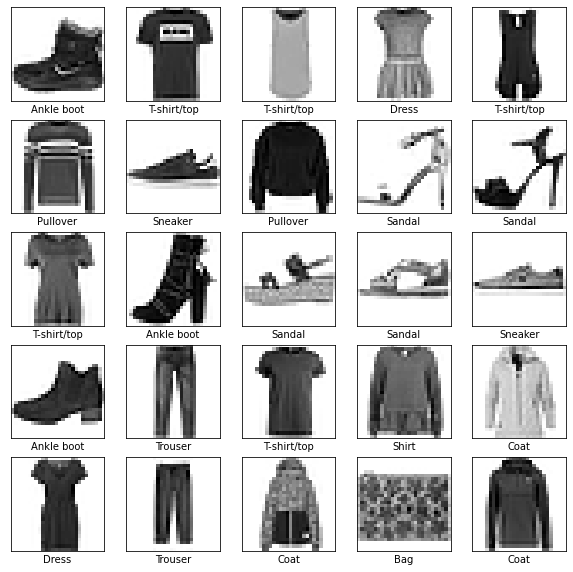

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],  cmap=plt.cm.binary) #cmap=GnBu
    plt.xlabel(class_names[y_train[i]])
plt.show()

<br>

<b>Camada Flatten</b>: Nivela a entrada. Não afeta o tamanho do lote. 

Achatar (Flatten) um tensor significa remover todas as dimensões, exceto uma.

Uma camada Flatten em Keras reformula o tensor para ter uma forma igual ao número de elementos contidos no tensor.

É o mesmo que criar uma matriz 1d de elementos.


<br>


In [12]:
# Rede neural 
model = Sequential([
                  Flatten(input_shape=(28,28)), # input reformatando os dados para 1D (28 * 28 = 784 pixels)
                  Dense(units=128, activation='relu'), # hidden layer 1 
                  Dense(units=54, activation='relu'), # hidden layer 2 
                  Dense(units=10, activation='softmax') # output layer 
                  ])

In [13]:
# Forma alternativa 
model = Sequential([
                  Input(shape=(28,28), name='input_layer'), # input layer 
                  Flatten(name='Flatten'), # transform input into 1D array
                  Dense(units=128, activation='relu', name='hidden_layer_1'), # hidden layer 1 
                  Dense(units=54, activation='relu', name='hidden_layer_2'), # hidden layer 2 
                  Dense(units=10, activation='softmax', name='output_layer') # output layer 
                  ])

In [14]:
# Aplicando Dropout 

model = Sequential([
                  Input(shape=(28,28), name='input_layer'),
                  Dropout(rate=0.20, seed=seed_value, name='Dropout_1'), # Dropout 
                  Flatten(name='Flatten'),
                  Dense(units=128, activation='relu', name='hidden_layer_1'),  
                  Dense(units=54, activation='relu', name='hidden_layer_2'),  
                  Dense(units=10, activation='softmax', name='output_layer')
                    ])

In [15]:
# summary da rede neural  
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dropout_1 (Dropout)          (None, 28, 28)            0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               100480    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 54)                6966      
_________________________________________________________________
output_layer (Dense)         (None, 10)                550       
Total params: 107,996
Trainable params: 107,996
Non-trainable params: 0
_________________________________________________________________
None


A primeira camada da rede, tf.keras.layers.Flatten, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os emfilere. Essa camada não tem paramêtros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consite de uma sequência de duas camadas tf.keras.layers.Dense. Essa são camadas neurais densely connected, ou fully connected. A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camda é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

In [16]:
model.compile(optimizer=SGD(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
# utilizando parâmetro "validation_data"
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 10s 2ms/step - loss: 1.2472 - accuracy: 0.5958 - val_loss: 0.7420 - val_accuracy: 0.7434
Epoch 2/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.7071 - accuracy: 0.7560 - val_loss: 0.6032 - val_accuracy: 0.7958
Epoch 3/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.6176 - accuracy: 0.7884 - val_loss: 0.5606 - val_accuracy: 0.8062
Epoch 4/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.5772 - accuracy: 0.7985 - val_loss: 0.5339 - val_accuracy: 0.8138
Epoch 5/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.5487 - accuracy: 0.8077 - val_loss: 0.5043 - val_accuracy: 0.8259
Epoch 6/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.5295 - accuracy: 0.8139 - val_loss: 0.4867 - val_accuracy: 0.8310
Epoch 7/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.5165 - accuracy: 0.8188 - val_loss: 0.4774 - val_ac

In [18]:
# avaliando 
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.4774 - accuracy: 0.8318


In [19]:
print('Binary CrossEntropy: {}'.format(test_loss))
print('Accuracy: {}'.format(test_acc))

Binary CrossEntropy: 0.4774412512779236
Accuracy: 0.8317999839782715


In [20]:
# predições 
predictions = model.predict(X_test)

In [21]:
predictions[0]

array([1.8468221e-05, 8.2972365e-06, 1.0431123e-05, 3.2609230e-06,
       2.9456178e-05, 8.6023219e-02, 1.4426063e-05, 2.0833865e-01,
       5.3764484e-03, 7.0017731e-01], dtype=float32)

In [22]:
# Classe predita 
np.argmax(predictions[0])

9

In [29]:
# métricas 
from sklearn.metrics import  accuracy_score, classification_report

y_pred = model.predict_classes(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred, target_names=class_names))

Acurácia: 0.8318


              precision    recall  f1-score   support

 T-shirt/top       0.73      0.86      0.79      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.71      0.72      0.72      1000
       Dress       0.85      0.85      0.85      1000
        Coat       0.66      0.82      0.73      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.71      0.40      0.51      1000
     Sneaker       0.91      0.90      0.90      1000
         Bag       0.92      0.95      0.94      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



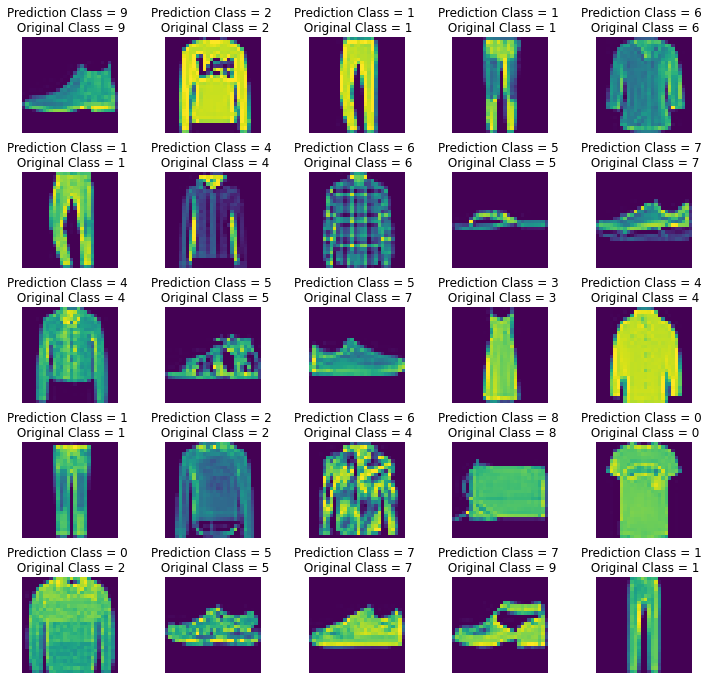

In [24]:
# images predict 
fig, axs = plt.subplots(5, 5, figsize=(12,12))
axs=axs.ravel()

for i in range(0,25):  
    axs[i].imshow(X_test[i].reshape(28,28))
    axs[i].set_title("Prediction Class = {} \n Original Class = {}".format(y_pred[i], y_test[i]))
    axs[i].axis('off')
plt.subplots_adjust(wspace=0.5)

<br>

History é um objeto que armazena todo o histórico de treinamento da Rede Neural
Armazenando as Epochs e seus erros. O objeto "histórico" retornado mantém um registro dos valores de perda e métricas durante o treinamento


<br>

In [25]:
history.history

{'accuracy': [0.5958333611488342,
  0.7559999823570251,
  0.7883958220481873,
  0.7985000014305115,
  0.8076666593551636,
  0.8139374852180481,
  0.8188124895095825,
  0.8208333253860474,
  0.8251875042915344,
  0.8290208578109741],
 'loss': [1.2471740245819092,
  0.7070831656455994,
  0.6176404356956482,
  0.5772085785865784,
  0.5486533045768738,
  0.5294501781463623,
  0.5165482759475708,
  0.5078130960464478,
  0.4978792369365692,
  0.4869162142276764],
 'val_accuracy': [0.7434166669845581,
  0.7957500219345093,
  0.8061666488647461,
  0.8137500286102295,
  0.8259166479110718,
  0.8309999704360962,
  0.8334166407585144,
  0.8292499780654907,
  0.8366666436195374,
  0.8392500281333923],
 'val_loss': [0.7419844269752502,
  0.6031819581985474,
  0.5606197714805603,
  0.5338714122772217,
  0.5042890310287476,
  0.48672574758529663,
  0.4774169921875,
  0.48143550753593445,
  0.46205103397369385,
  0.4570655822753906]}

<br>
<br>

### Curva de Aprendizado da Rede neural 


<br>

Text(0.5, 1.0, 'Train - Accuracy')

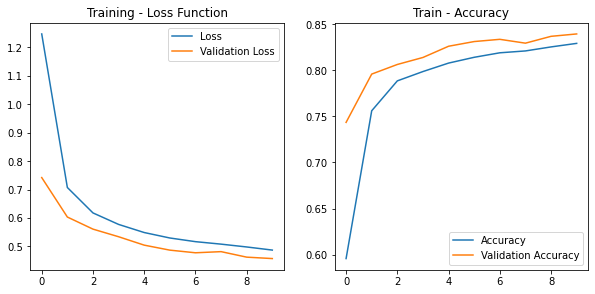

In [26]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

<br>


### matrix de confusão 

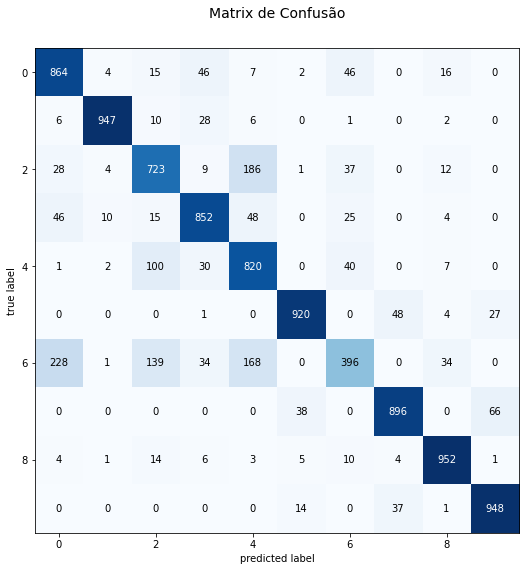

In [27]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(8,8)) # testar argumento "class_names"
plt.title('Matrix de Confusão', fontsize=14)
plt.tight_layout()

<br>
<br>


### Visualizar Rede neural 


<br>

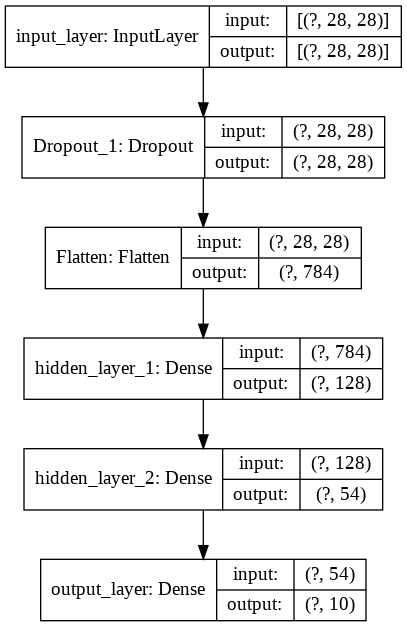

In [28]:
# Arquitetura da Rede Neural
plot_model(model, "multi_layer_perceptron.png", show_shapes=True)

<br>
<br>
<hr>

<br>
<hr>
<br>

